In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from IPython.display import Image

# Introdução ao filtro de Kalman

1. Criado por Rudolph E. Kalman em 1960
2. Desenvolvido inicialmente como uma solução recursiva para filtragem linear de dados discretos.
3. Utiliza equações matemáticas que implementam um estimador preditivo de estados, buscando corrigir interativamente a resposta de um determinado sistema através de multiplas variáveis relacionadas a ele.
4. Aplicado a Sistemas de Inferências, processamento de imagens, supervisor de eventos discretos.

1. Considere a medição de temperatura de uma sala. 
2. Nesse caso, um sensor pode fornecer a temperatura $t=30$
3. Sabemos que um sensor terá uma determinada precisão, ou seja, toda media de valor envolve algum grau de erro.
4. Imagine que um fabricante diga que, para uma determinada faixa de temperatura, o erro do sensor é de 5 graus.
5. Ou seja, 5 graus acima ou abaixo.
6. Assim a temperatura anterior pode estar entre $25^{o}$ e $35^{o}$.

1. Vamos chamar o erro de ruído, assim, podemos definir
    - <center> $Temperatura_{observada} = temperatura_{medida}+ruido$</center>
2. Em alguns tipos de sistema, o estado atual de uma variável é dependente do seu estado anterior.
3. Nesse caso, podemos estimar o valor atual, baseado no valor anterior.
4. Por exemplo, sabendo que a temperatura está decaindo 70% a cada medição, temos:
    - <center> $Temperatura_{prevista} = temperatura_{anterior}\times 0.7+ruido$</center>

1. Agora temos duas equações, uma para o estado real do sistema e outra com o estado previsto:
    - <center> $Temperatura_{observada} = temperatura_{medida}+ruido$</center>
    - <center> $Temperatura_{prevista} = temperatura_{anterior}\times 0.7+ruido$</center>
2. O Filtro de Kalman servirá para integrarmos estas duas equações de modo a prover uma estimativa adequada, com baixo valor de ruído, dentro do possível.


## Quando utilizar

1. Possibilidade de obter medições sobre um determinado evento a uma taxa constante
2. As medidas têm um erro que segue uma distribuição normal (erro gaussiano).
3. A matemática que regula a situação é conhecida
4. O processo que será medido pode ser descrito como um sistema linear
5. Busca-se uma estimativa do que está realmente acontecendo.

## Uma visão geral do filtro de Kalman

1. Vamos assumir o filtro de Kalman para uma única variável.
2. Vamos considerar três etapas distintas para o filtro:
    - Cálculo do Ganho de Kalman
    - Cálculo do Estado Atual
    - Cáculo do Novo Erro na Estimativa

### Cálculo do Ganho de Kalman
1. O Ganho de Kalman é a importância relativa ao erro associado ao valor estimado e o erro associado à medição, com relação a variável.
2. Assumindo:
    - <center>$K = \frac{ruido_{estimativa}}{ruido_{estimativa}+ruido_{medicao}}$</center>
3. $K$ - ganho de Kalman
4. $ruido_{estimativa}$ - erro da estimativa
5. $ruido_{medicao}$ - erro da medição
6. Quando $K$ próximo de 1, as medições são acuradas e a estimativa instável. $K$ próximo de zero, as medições são inacuradas e as estimativas estáveis

### Cálculo do Estado Atual
1. Considerando o estado anterior, o Ganho de Kalman e a medição mais atual obtida de uma variável, a estimativa do valor atual do sistema será:
    -<center>$estado_{atual} = estado_{anterior}+K(medicao-estado_{anterior})$</center>
2. $estado_{atual}$ - estimativa do estado atual do sistema
3. $estado_{anterior}$ - estivativa do estado anterior
4. $K$ - Ganho de Kalman
5. $medicao$ - medição mais atual do sistema

### Calcular o novo erro na estimativa
1. A partir do estado atual da variável, calcula-se o novo erro que serve novamente de entrada para o Ganho de Kalman.
    - <center>$ruido_{atual} = (1 - K)ruido_{anterior}$</center>
3. $ruido_{atual}$ - erro atual
4. $K$ - Ganho de Kalman calculado anteriormente
5. $ruido_{anterior}$ - erro do estado anterior do sistema

### Exemplos
1. Considere as seguintes condições:
    - Temperatura real: ?
    - Temperatura inicial estimada: 28 $^{o}C$
    - Erro na estimativa: $\pm 2 ^{0}C$
    - Medição inicial: 32 $^{o}C$
    - Erro na medição: $\pm 1 ^{o}C$

In [5]:
def ganho_kalman(erro_estimado, erro_medicao):
    k = erro_estimado / (erro_estimado + erro_medicao)
    return k

def estado_atual(estado_anterior, k, medicao):
    est_atual = estado_anterior + k * (medicao - estado_anterior)
    return est_atual

def ruido_atual(erro_anterior, k):
    erro_atual = (1-k) * erro_anterior
    return erro_atual
    
estado_inicial = 28
medida = 32
erro_estimado = 2
erro_medido = 1

k = ganho_kalman(erro_estimado, erro_medido)
estado_a = estado_atual(estado_inicial, k, medida)
erro_a = ruido_atual(erro_estimado, k)
print(round(k, 2), round(estado_a, 2), round(erro_a, 2))
    

0.67 30.67 0.67


### Exercício:


1. Considere os seguintes valores:
    - Temperatura real: ?
    - Temperatura inicial estimada: 28$^{o}$
    - Erro na estimativa: $\pm 2^{o}$
    - Medições: 32$^{o}$, 35$^{o}$, 33$^{o}$
    - Erro na medição $\pm$ 1$^{o}$
2. Use as equações anteriores para calcular a temperatura real, assumindo que as medições foram obidas em sequências.

## Modelo Multidimensional

1. Casos reais normalmente envolvem mais de uma variável.
2. Nesse caso, tabralhar com matrizes ajuda no processo de cálculo.


### Matriz de Estado

1. Em Filtro de Kalman, o Estado do Sistema é um conjunto de variáveis que iremos analisar do sistema de acordo com nossa conveniência.
2. A matriz de estado será representada po $X$
3. Por exemplo, considere um objeto se movendo a velocidade constante, nesse caso temos interesse em conhecer a posição $x$ e a velocidade $\dot{x}$.
    - <center> $X = \begin{bmatrix} x \\ \dot{x} \end{bmatrix}$</center>
4. OBS: $\dot{x} = \frac{dx}{dt}$ - Derivada primeira da posição com relação ao tempo - velocidade.

1. Para um objeto que se mova num ambiente bidimensional (x-y):
    - <center> $X = \begin{bmatrix} x \\ y \\ \dot{x} \\ \dot{y} \end{bmatrix}$</center>
2. Em 3D
    - <center> $X = \begin{bmatrix} x \\ y \\ z\\ \dot{x} \\ \dot{y} \\ \dot{z}\end{bmatrix}$</center>


### Matriz de Covariância
1. Tem como objetivo calcular o erro na estimativa do estado
2. É produzido pela combinação da variância do erro das estimativas
3. Exemplos:
    - <center> 1D: $P = \begin{bmatrix}\sigma_{x}^{2} \end{bmatrix}$</center>    
    <br>
    <br>
    - <center> 2D: $P = \begin{bmatrix}
                        \sigma_{x}^{2} & \sigma_{x}\sigma_{y}\\
                        \sigma_{y}\sigma_{x} & \sigma_{y}^{2}
                    \end{bmatrix}$
       </center> 
    <br>
    <br>
    - <center> 2D: $P = \begin{bmatrix}
                        \sigma_{x}^{2} & \sigma_{x}\sigma_{y} & \sigma_{x}\sigma_{z} \\
                        \sigma_{y}\sigma_{x} & \sigma_{y}^{2} & \sigma_{y}\sigma_{z} \\
                        \sigma_{z}\sigma_{x} & \sigma_{z}\sigma_{y} & \sigma_{z}^{2} 
                        \end{bmatrix}$
       </center> 
     <br>
     <br>
4. $\sigma_{x}^{2}$ - é a variância de uma determinada variável $x$
5. $\sigma_{x}\sigma_{y}$ - é a covariância entre duas variáveis $x$ e $y$

#### Exercício
1. Calcule a matrix de covariância para um objeto que se move ao longo do eixo $x$ com as seguintes características:
    - $x_{0} = 50$ com variância de $0,5m$
    - $v_{0} = 5 $ ms$^{-1}$ com variância de $0,2$ms$^{-1}$

### Construíndo o modelo
1. $X$ é a matriz de estado, representando as variáves que serão analizadas
2. $P$ é a matriz de covariância do processo (que representa o erro das estimativas do sistema)

### Etapara de predição

1. Estitamtiva do novo estado do sistema:
    <center>$X_{est} = AX_{k-1}+Bu_{k}+w_{k}$</center>
2. $X_{est}$ - estado atual
3. $X_{k-1}$ - EStado anterior
4. $u_{k}$ - Sinal de controlo
5. $w_{k}$ - Ruído do processo
6. $A$ e $B$ são, respectivamente, matriz de transição e matriz de controle.

1. Estitamtiva da nova matriz de covariância:
<center>$P_{k}=AP_{k-1}A^{T}+Q_{k}$</center>
2. $Q$ matriz de covariância do ruído do processo


### Estimativa do estado do sistema
1. Considere que desejamos rastrear o comportamento de um objeto no tempo.
2. A expressão para o deslocamento é:
<center>$x = x_{0} + v_{0}t+\frac{1}{2}a_{0}t^{2}$</center>
<br>
<br>
<center>$v{_x} =  v_{0}t+a_{0}t$</center>
<br>
<br>
<center>$a_{x} = a_{0}$</center>
<br>
<br>
3. Na forma matricial:
    - <center>  $\begin{bmatrix} x \\ v_{x} \\ a_{x} \end{bmatrix} = 
                    \begin{bmatrix}
                    1 & t & \frac{1}{2}t^{2} \\
                    0 & 1 & t \\
                    0 & 0 & 1
                    \end{bmatrix}\begin{bmatrix} x_{0} \\ v_{0} \\ a_{0} \end{bmatrix}$
      </center>    



1. Estamos interessados nas variáveis $x$ e $\dot{x}$, nesse caso, para o filto de Kalman temos:
<br>
<br>
<center>$A = \begin{bmatrix}
              1 & t  \\ 
              0 & 1 \\
              \end{bmatrix}$</center>
<br>
<br>
2. A componente $Bu_{k}$ expressa a matriz de controle, que determina como o estado da variável se modifica. $B$ é o modelo de controle e $u_{k}$ é a variável de controle. No nosso caso, estão relacionados com a aceleração do sistema:
<br>
<br>
<center>$B = \begin{bmatrix} \frac{1}{2}t^{2} \\ t  \end{bmatrix}$</center>
<br>
<br>
<center>$u = \begin{bmatrix} a \end{bmatrix}$</center>

1. A equação de predição para o filtro de Kalman será:
    <center>$X_{atual} = AX_{anterior}+Bu+w$</center>
    <br>
    <br>
    <center>$X_{atual} = \begin{bmatrix}
          1 & t  \\ 
          0 & 1 
          \end{bmatrix} \begin{bmatrix}
          x \\ 
          \dot{x}
          \end{bmatrix}+\begin{bmatrix} \frac{1}{2}t^{2} \\ t  \end{bmatrix}\begin{bmatrix} a \end{bmatrix}+w$</center>
2. O componente $w$ representa o ruído do processo.



#### Exercício
1. Expresse A, B e u para um sistema 3D.
2. Considere o lançamento de um projétil. Desprezando a resistência do ar, temos que as equações do movimento são:
<center> $x = x_{0}+v_{0}t$;</center>
<br>
<br>
<center>$y = y_{0}+v_{0}t - \frac{1}{2}gt^{2}$</center>
<br>
<br>
Escreva a equação de $A$, $B$ e $u$ para esse novo sistema. Escreva a equação de previsão, para o filtro de Kalman.


### Etapa de Correção:
1. Calculamos o Ganho de Kalman:
<br>
<br>
<center>$K = \frac{P_{k}H}{HP_{k}H^{T}+R}$</center>
<br>
<br>
    - Com $H$ sendo a matriz de observações e $R$ a matriz de covariância de erro no sensor
2. Em seguida, atualizam-se os valores atuais do sistema utiliando os dados de medição:
<br>
<br>
<center>$X_{k}=X_{est}+K(Y-HX_{est})$</center>
<br>
<br>
    -Com $Y=CX_{med}+z$, em que $X_{med}$ é a medição, $z$ é o erro na medição. $C$ será:
    <br>
        <br>
        - <center>$C = \begin{bmatrix} 1 & 0 \end{bmatrix}$</center> se estivermos observando apenas a posição da variável $X$;
        <br>
        <br>
        - <center>$C = \begin{bmatrix} 0 & 1 \end{bmatrix}$</center> se estivermos observando apenas a velocidade da variável $X$;
        <br>
        <br>
        - <center>$C = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}$</center> para medição 1D;
        
3. Em terceiro lugar, atualizam-se os valores da matriz covariância:
<center>$P_{k} = (I-KH)P_{est}$</center>
<br>
<br>
sendo $I$ a matriz identidade.

### Implementação das equação do filtro de Kalman em Python
1. Previsão: 
    <center>$X_{atual} = AX_{anterior}+Bu+w$</center>
2. Previsão da covariância:
<center>$P_{k}=AP_{k-1}A^{T}+Q_{k}$</center>
3. Ganho de Kalman
<center>$K = \frac{P_{k}H}{HP_{k}H^{T}+R}$</center>
4. Matrix de observação
<center>$Y=CX_{med}+z$</center>
5. Estado novo:
<center>$X_{k}=X_{est}+K(Y-HX_{est})$</center>
6. Nova matriz de covariância
<center>$P_{k} = (I-KH)P_{est}$</center>



In [28]:
from numpy import array, dot
from numpy import linalg

def previsao(A, B, X_prev, u, w):
    X_atual = dot(A, X_prev) + dot(B, u) + w
    return X_atual

def privisao_covariancia(A, P, D):
    P = dot(dot(dot(A, P),A.transpose()),D)
    return P

def ganho_de_kalman(H, R, P):
    S = dot(dot(H, P), H.transpose()) + R
    invS = linalg.inv(S)
    K = dot(dot(P, H.transpose()),invS)
    return K

def observacoes(n, X, H):
    Z = array([n])
    Y = Z.transpose() - dot(H, X)
    return Y

def novo_estado(Y, x, K):
    x = x + dot(K,Y)
    return x

def nova_covariancia(P, I, K, H):
    P0 = I - dot(K, H)
    P = dot(P0,P)
    return P

In [22]:
print ("Kalman Filter Example- (x)(x')")
print ("One-diretional car - (x)(x')")
print ("--------------------------------------")

measurements = [[20,5],   # (x)(x')- 0 s
                [34,10],  # (x)(x')- 1 s
                [45,11],  # (x)(x')- 2 s
                [60,15],  # (x)(x')- 3 s
                [70,16],  # (x)(x')- 4 s
                [80,14],  # (x)(x')- 5 s
                [95,20]]  # (x)(x')- 6 s

##Initial Conditions 

dt    = 1  # time lapse 
a     = 2  # example acceleration (m/s^2) 
sd_x  = 2  # example standard-deviation for estimated position - x (m)
sd_v  = 3  # example standard-deviation for estimated velocity - x' (m/s)
d_x   = 1  # example standard-deviation for measured position - x (m)
d_v   = 2  # example standard-deviation for measured velocity - x' (m/s)




Kalman Filter Example- (x)(x')
One-diretional car - (x)(x')
--------------------------------------


In [23]:
##Matrices
###State Matrix
A = array([[1.,dt],
            [0.,1.]]) 

B = array([[0.5* dt * dt],
            [dt]])

###Initial state 
x = array([[0.],
            [0.]])

u = array([[a]])

w = array([[0.],
            [0.]])

C  = array([[1,0],
             [0,0]])

D = array([[1,0],
            [0,1]])

H = array([[1,0],
            [0,1]])

I = array([[1,0],
            [0,1]])


In [24]:
### Predicted Process Covariance Matrix

P = array([[sd_x*sd_x, 0],
            [0, sd_v*sd_v]])

### Measurement Covariance Matrix 

R = array([[d_x * d_x, 0],
[0, d_v * d_v]])

prsao = []
crKalman = []
tempo = []



In [25]:
###Loop
for n in range(len(measurements)-1):
    # Passo de Previsão
    x = previsao(A, B, x, u, w)    
    P = privisao_covariancia(A,P,D)
    prsao.append(x)
      
    # CPasso de Correção
    
    K = ganho_de_kalman(H,R,P)
    Y = observacoes(measurements[n+1],x,H)
    
    x = novo_estado(Y,x,K)
    P =  nova_covariancia(P,I,K,H)
    
    crKalman.append(x)
    tempo.append(n)

crKalman = array(crKalman)
prsao = array(prsao)
tempo = array(tempo)
measurements = array(measurements)

<IPython.core.display.Javascript object>


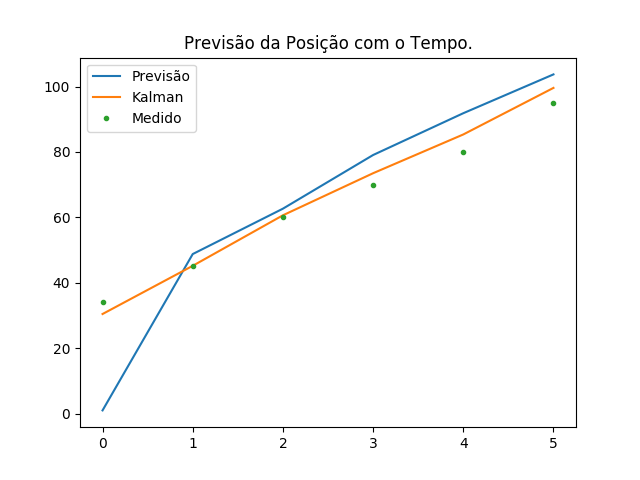

In [26]:
plt.title("Previsão da Posição com o Tempo.")
plt.plot(tempo, prsao[:,0], label='Previsão')
plt.plot(tempo, crKalman[:,0], label='Kalman')
plt.plot(tempo, measurements[1:,0], '.', label='Medido')
plt.legend()


<IPython.core.display.Javascript object>


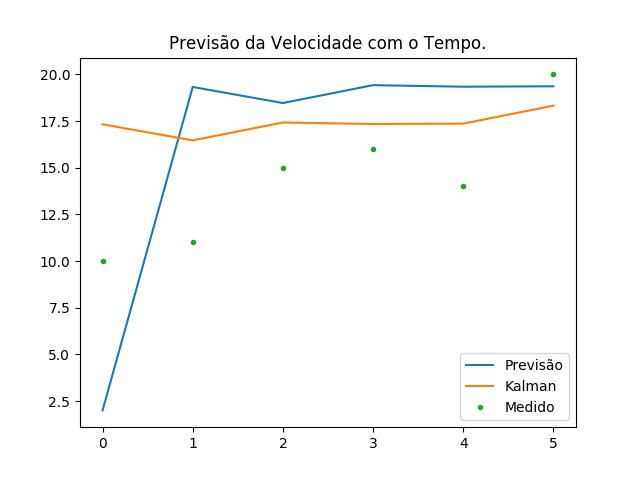

In [29]:
plt.cla()
plt.title("Previsão da Velocidade com o Tempo.")
plt.plot(tempo, prsao[:,1], label='Previsão')
plt.plot(tempo, crKalman[:,1], label='Kalman')
plt.plot(tempo, measurements[1:,1], '.', label='Medido')
plt.legend()

## Referências:
1. REVISTABW. Introdução ao Filtro de Kalman: Conceitos inicias. Revista Brasileira de Web: Tecnologia. Disponível em <http://www.revistabw.com.br/revistabw/kalman-conceitos-iniciais/>. Acessado  em 31/08/2018